# Weekly Homework 9: [put your name here]

Go through this notebook, following the instructions! 

- TAs will mark this assignment by checking ***MarkUs*** autotests and then checking for the presence and correctness of the decision tree visualization in `Q7`, confusion matrices in `Q8`, feature importance plots in `Q10`, and partial dependency plots in `Q21`, and then manually reviewing and marking the written submissions `Q13`, `Q20`, and `Q23`.
    - The following questions "automatically fail" during automated testing so that MarkUs exposes example answers for student review and consideration for these problems.  These "failed MarkUs tests" are not counted against the student: `Q4`, `Q5`, `Q9`, `Q11`, `Q22`, and `Q23`


> You can add new cells if you need (with the "+" button above); but, deleting or reordering cells could very likely cause your notebook to fail ***MarkUs*** autotesting (and you'd have to start over and re-enter your answers into a completely fresh version of the notebook to get things working again...).
>
> - ***MarkUs*** autotesting works by running your notebook from top to bottom, and if there's an error when doing this (such as a variable is getting called that hasn't yet been defined, etc.) it can cause automated tests to fail; so, make sure your notebook runs from top to bottom without error once you're done (which you can do by restarting the "Restart & Run All" from the "Kernel" menu).



We begin by importing dataset and the libraries we will use.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import graphviz as gv
happiness2017 = pd.read_csv("happiness2017.csv")

from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data, columns = cancer_data.feature_names)
cancer_classes = pd.DataFrame(cancer_data.target).replace({0:'Malignant',1:'Benign'})
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.inspection import PartialDependenceDisplay

# Gallup Report Happiness Survey
Using data from the Gallup World Poll (and the World Happiness Report), we are interested in predicting which factors influence life expectancy around the world. These data are in the file happinessdata_2017.csv, which has already been imported and is available as the variable `happiness2017`.

### Q0: Add a new column to `happiness2017` called `life_exp_good` which is `True` for countries with life expectancy (strictly) higher than 65 years, and `False` otherwise.

In [2]:
# Q0: your answer will be tested based on your `happiness2017` object! 


### Q1: Create a new dataframe `happiness2017_cleaned` containing the columns below and all rows with `NaN` entries dropped, and an 80/20 split (80% training set and 20% testing set) for this new data.

- `life_exp_good`, `logGDP`, `social_support`, `freedom`, and `generosity`

> To do this in a reproducible way, we're going to set a "random seed"; and, in preparation for this, let's take a moment to motivate our choice of $1985$ for the "random seed".
>
> Only remove rows with `NaN` entries once you've subset to the columns you're interested in. This will minimize potentially unnecessary data loss... Of course we might want to consider imputing missing data to further mitigate data loss, but the considerations for doing so are more advanced than the level of our course, so we'll not consider that for now. At any rate, `NaN` entries can't be used in their raw form with the `scikit-learn` methodologies below, so we do need to remove them to proceed with our analyses.

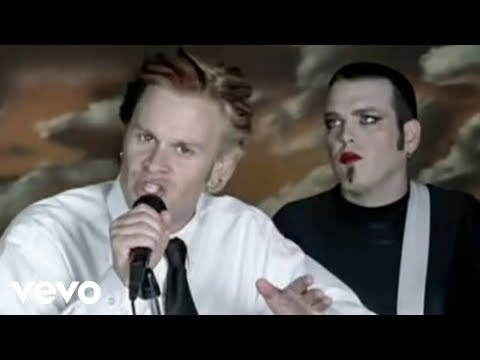

In [5]:
from IPython.display import YouTubeVideo
# 19, 19, 1985!
YouTubeVideo('K38xNqZvBJI', width=800, height=500)
# Remember, always choose your favorite number for your "random seeds"
# The specific number you choose doesn't even really matter, which is why 
# it's so important to make a big deal about it!

In [6]:
# Q1: your answer will be tested based on your `happiness2017_cleaned` and `train` and `test` objects! 
np.random.seed(1985) # Do NOT change this line: it sets the "random number generation seed"
# which makes the "pseudorandomness" gererated in the code the same every time and this
# makes the code reproducibile which ensures that our testing code works properly every time
happiness2017_cleaned = None
train, test = None,None


### Q2: Train a classification tree `clf` using only the  `social_support` variable to predict if a country has good life expectancy

#### Use default values for all (tuning) parameters instantiating the Decision Tree Classifier.

> - Hint 1: you'll need the `.fit()` method... googling "DecisionTreeClassifier .fit()" will help you find the `scikit-learn` "Decision Trees" documentation, which would be helpful...
> - Hint 2: should you use the `train` data, or the `test` data, or all this data combined to fit the classification tree?

In [9]:
# Q2: your `clf` object will be tested for correctness (and you don't need to do anything else here yet)!
np.random.seed(1985) # Do not change this line as there is some randomeness when calling `clf.fit(...)`
clf = tree.DecisionTreeClassifier()


170

Now you can visualize your tree!

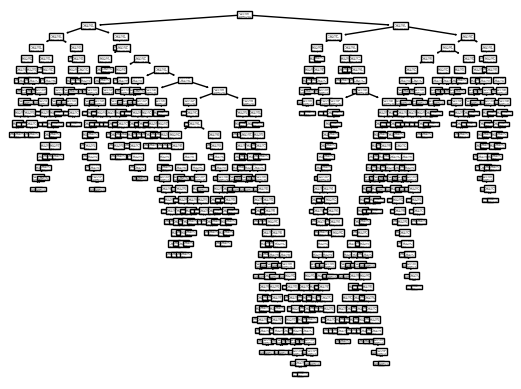

In [12]:
_ = tree.plot_tree(clf)

Or to make it more immediately readible we can use graphviz.

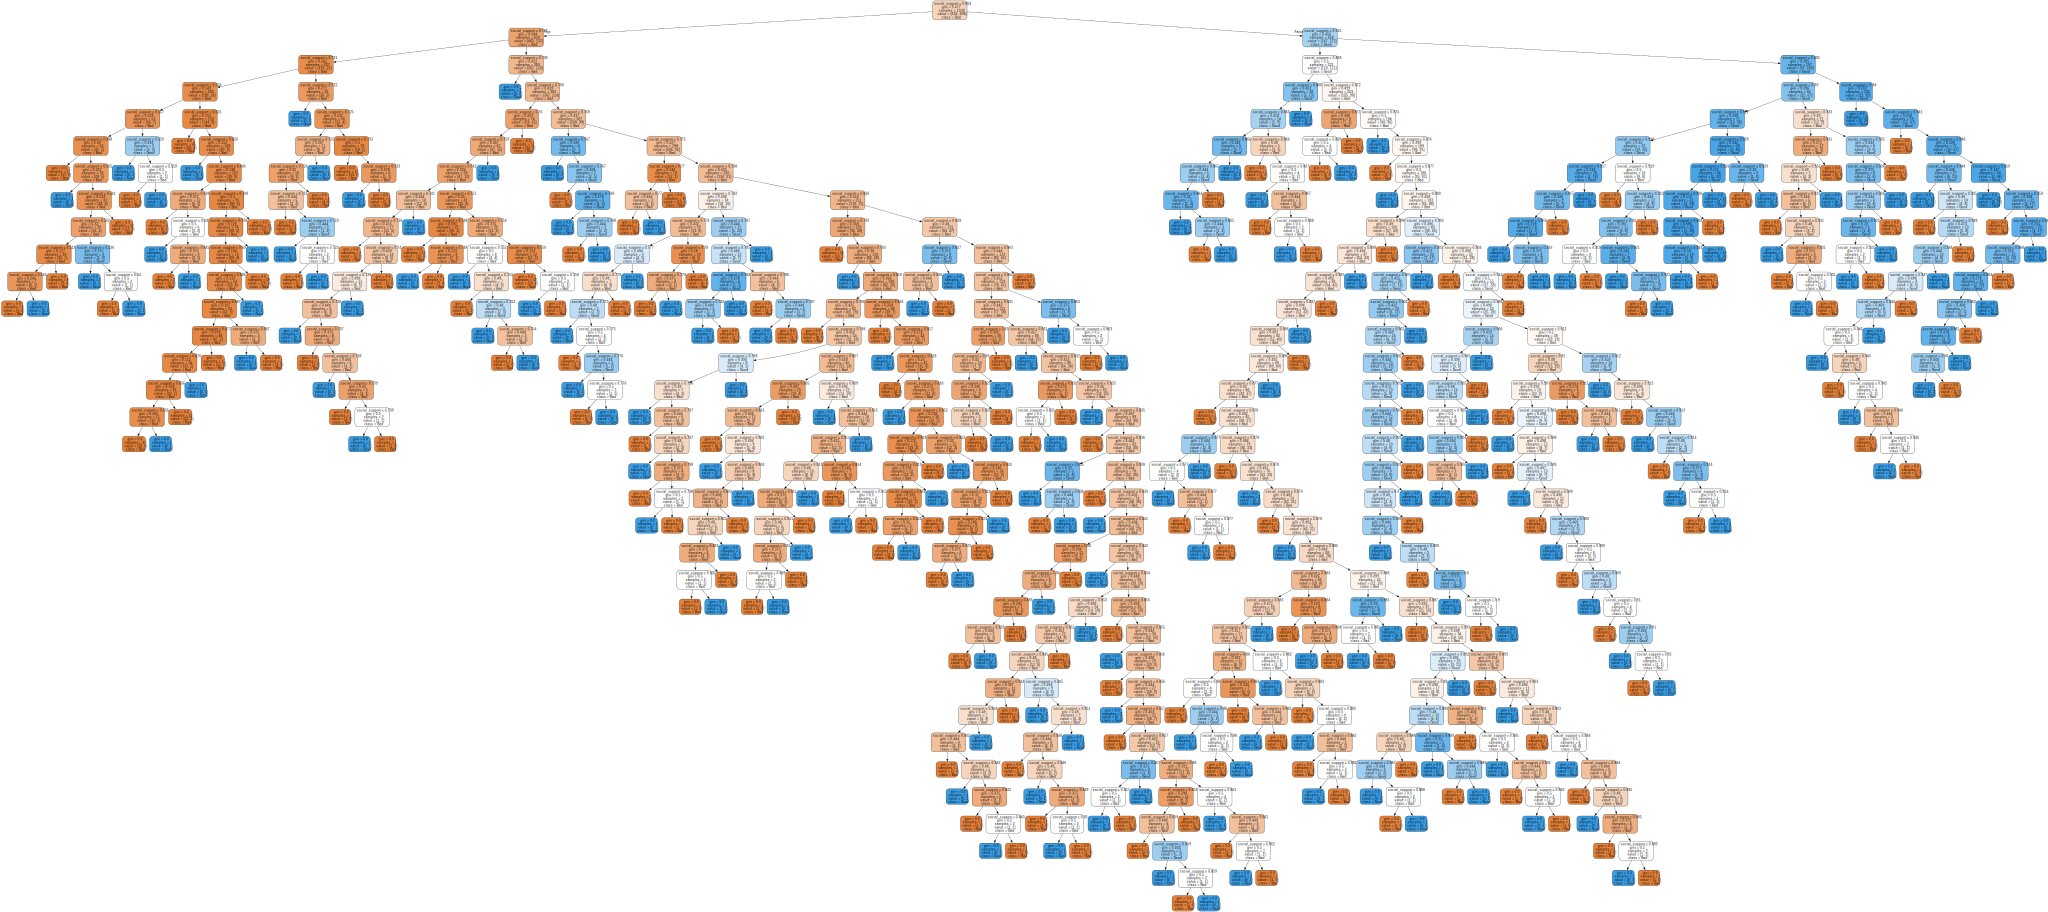

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=["social_support"],
                                class_names=["Bad","Good"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data, format='SVG')
graph # Comment this line and re-run the cell so the figure doesn't render if your final file size is too large for MarkUs
# Same solution if MarkUs notebook renderer gives you an error of "nbconvert failed: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration."
# It's your responsibility to check this: TAs can't provide manual marks if your notebook doesn't render in MarkUs

And to limit the visualization itself we can add the `max_depth` parameter to our call of `export_graphviz`.

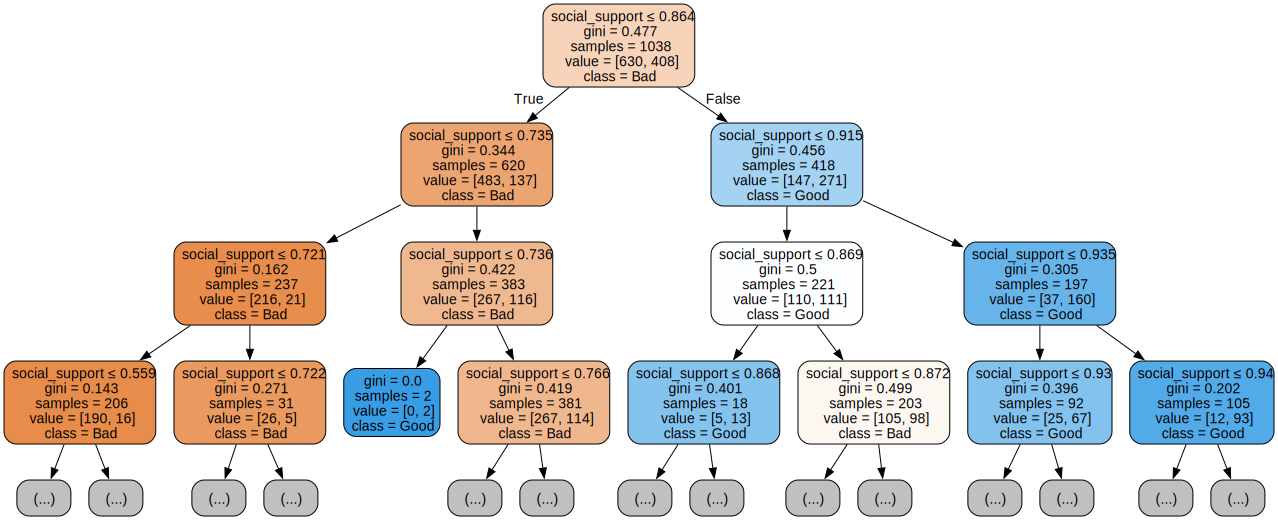

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3,
                                feature_names=["social_support"],
                                class_names=["Bad","Good"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data, format='SVG')
graph # Comment this line and re-run the cell so the figure doesn't render if MarkUs notebook renderer gives you an error of 
# "nbconvert failed: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration."
# It's your responsibility to check this: TAs can't provide manual marks if your notebook doesn't render in MarkUs

### Q3: How many observation are in the training data set and the test data set?

> - Hint: a single observation consists of all the measurements made on a single entity. In Machine Learning, the  "vector" of all values measured for a single entity comprise a single "observation" so this just corresponds (typically) to a row of a data frame.

In [16]:
# Q3: your answer will be tested!
num_train = None # Replace this with the number of observations in the training set
num_test = None # Replace this with the number of observations in the test set
Q3 = (num_train, num_test) # Do not change this line

### Q4: Why did you fit the classification tree with the data set you did?

#### Write a one to two sentence answer to this question in markdown cell below
- Compare your response to the answer given in the ***MarkUs*** output

> Answer here...


### Q5: Comment on the complexity of the decision tree classification model visualized above, especially in light of the fact that only a single feature was used to predict the outcome in this model.


#### Write a one to two sentence answer to this question in markdown cell below
- Compare your response to the answer given in the ***MarkUs*** output

> Answer here...


### Q6: Use the `clf.predict()` method to answer the following questions and confirm your answer using the first `graphviz` visualization of the decision tree

#### Use values of `False`  and `True` as given by `clf.predict()` (corresponding to "Bad" and "Good"): always be sure you know what binary/boolean predictions actually correspond to in the original terms of a problem

a) Does your decision tree predict that a country with `social_support = 0.49` has good life expectancy?  
b) what if `social_support = 0.5`  
c) what if `social_support = 0.51`  
d) what if `social_support = 0.9`  

> - Hint: `pd.DataFrame({'name': [<values>]})`

In [22]:
# Q6: your answer will be tested!
Q6a = None # Replace this with True or False: don't supply something like array([False])
Q6b = None
Q6c = None
Q6d = None
Q6 = (Q6a, Q6b, Q6c, Q6d) # Do not change this line

# Do these predictions make sense to you?

Look at how these small differences in the input rapidly change the predicted label... it seems kind of strange. It's a little hard to intuitively see why predictions should change like this... it makes you wonder if the model is really doing anything meaningful here.  

Perhaps the model might just actually be overly complex and convoluted and might be overinterpreting the data used to fit it (which we call overfitting). Since you'll probably agree that the behaviour of the model that we're observing seems a bit off, you'll probably also agree that it's a reasonable idea to try reduce the complexity of the model so it can be more reliably estimated with the data at hand.  With that in mind...

### Create and fit a new classification decision tree model `clf2` for the same feature and outcome used for `clf1` but with a maximum depth of 2

In [ ]:
np.random.seed(1985) # Do not change this line as there is some randomeness when calling `clf.fit(...)`
clf2 = None # The parameter that you're looking for is `max_depth`
# But note that this is fundamentally different than the `max_depth` parameter for `tree.export_graphviz` (why?)

# Uncomment and run the line below to see the function documentation
#tree.DecisionTreeClassifier?

### Q7: Visualize the  `clf2` Decision Tree just created immediately above (with  `max_depth` parameter set to `2`) and reanswer the questions asked in Q6 based on `clf2`.

#### Use the same train/test split data used so far when fitting  `clf2` above.

> - Hint: Make sure you're now using `clf2` rather than `clf` 

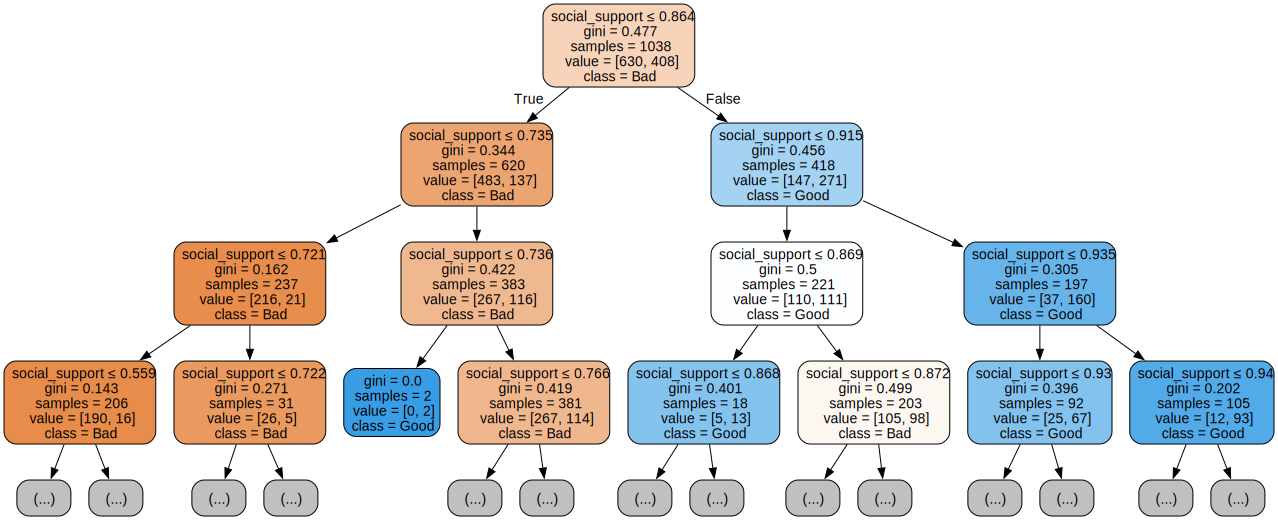

In [26]:
# Add your Decision Tree visualization code here: your code is what will be checked here

graph # Comment this line and re-run the cell so the figure doesn't render if MarkUs notebook renderer gives you an error of 
# "nbconvert failed: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration."
# It's your responsibility to check this: TAs can't provide manual marks if your notebook doesn't render in MarkUs

In [29]:
# Q7: your answer will be tested!
Q7a = None # Replace this with True or False
Q7b = None
Q7c = None
Q7d = None
Q7 = (Q7a, Q7b, Q7c, Q7d) # Do not change this line

### Train classification tree `clf3` with features `logGDP`, `social_support`, `freedom`, and `generosity` (to again predict if a country has good life expectancy)

#### Use the same train/test split data used so far and use default (tuning) parameters (no maximum tree depth) when instantiating the model 

In [34]:
np.random.seed(1985) # Do not change this line as there is some randomeness when calling `clf.fit(...)`
clf3 = None


DecisionTreeClassifier()

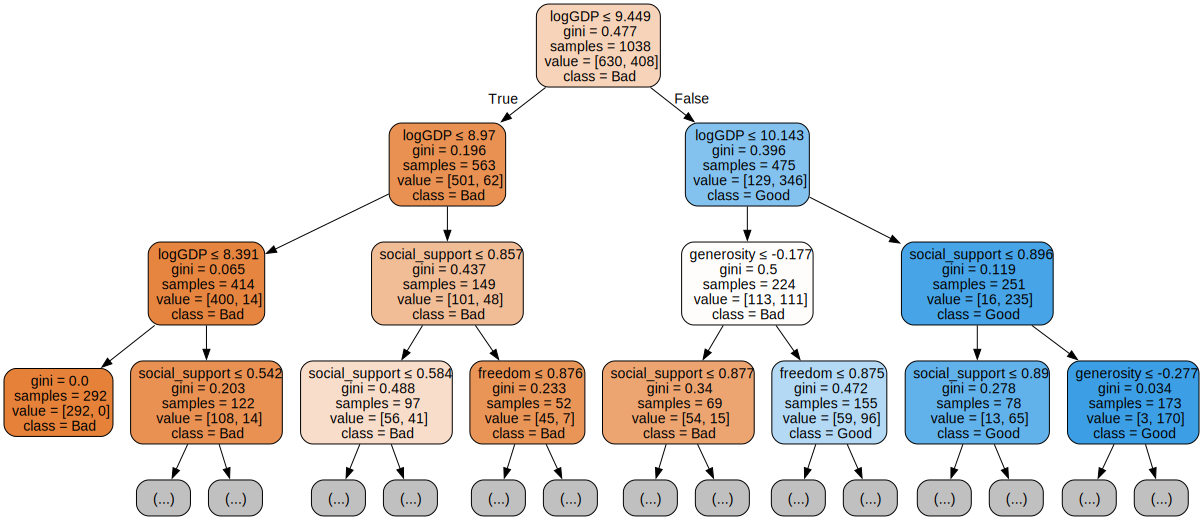

In [35]:
dot_data = tree.export_graphviz(clf3, out_file=None, max_depth=3,
                                feature_names=["logGDP", "social_support", "freedom", "generosity"],
                                class_names=["Bad", "Good"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data, format='SVG')
graph # You can comment this line and re-run so the figure doesn't render if MarkUs notebook renderer gives you an error of 
# "nbconvert failed: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration."
# It's your responsibility to check this: TAs can't provide manual marks if your notebook doesn't render in MarkUs

### Q8: Use the testing dataset you created in Q1 to create confusion matrices for `clf2` and `clf3`. Report the sensitivity (true positive rate), specificity (true negative rate) and accuracy for each of the trees/models.

#### Provide your answers as decimal numbers with three signifiant digits, such as `0.123` (and not as percentages like `12.3%`), and treat “Good” life expectancy as the positive response and prediction class. 

> - Hint 0: Use `np.round(0.1234,3)` to produce the correct rouding for the answers  
> - Hint 1: Does the `y_true` or `y_pred` parameter go first in the `confusion_matrix` function?  
> - Hint 2: Which columns/features of the `test` data set should be used for `clf2` versus `clf3`?  
> - Hint 3: Making sure you know how a confusion matrix is labeled can be tricky; so, <br>to keep things
>   easier for you the way it works is demonstrated below 
>   ```python
>      ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred, labels=[False, True]), 
>                             display_labels=["Bad","Good"]).plot()
>   ```
>   (i.e., labels are sorted so `False` comes before `True` and this corresponds to "Bad" then "Good")
> - Hint 4: If you need more help, see the [Confusion Matrices and Metrics](#cf) explainations just below

In [36]:
# Q8: your answer will be tested!
(clf2_sensitivity, clf2_specificity, clf2_accuracy) = (None, None, None) # Replace the `None`s with the corresponding answers
(clf3_sensitivity, clf3_specificity, clf3_accuracy) = (None, None, None)
Q8 = (clf2_sensitivity, clf2_specificity, clf2_accuracy) + (clf3_sensitivity, clf3_specificity, clf3_accuracy)

<a id='cf'></a>
# Confusion Matrices and Metrics

- **Accuracy** is the proportion of cases that are correctly identified.
- **Sensitivity** is the proportion of actual positive cases which are correctly identified to be positive (as true positives)
    - **Sensitivity** is also known as **true positive rate (TPR)**
- **Specificity** is the proportion of actual negative cases which are correctly identified to be negative (as true negative)
    - **Specificity** is also known as **true negative rate (TNR)**
- **False positive rates (FPR)** are defined to be the proportion of actually negative cases which are incorrectly identified (as false positives)
- **False negative rates (FNR)** are defined to be the proportion of actually positive cases which are incorrectly identified (as false negatives)
    - *but noticed how the FPR and FNR work in a sort of "flipped" manner in these definitions as they are defined with respect to the truth*

In formulas

\begin{align*}
\text{Accuracy}  & = {} (TP+TN)/\text{"total # of cases"}\\
TPR & = {} TP/(TP+FN) = 1-FNR \\
TNR & = {} TN/(TN+FP) = 1-FPR
\end{align*}

and you can read more and see a (greatly expanded) handy list of formulas at the following [wikipedia page.](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)


### Q9: Explain what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for `clf2` and `clf3`) are better

#### Write a three to four sentence answer to this question in markdown cell below

- Compare your response to the answer given in the ***MarkUs*** output

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(train.life_exp_good, clf.predict(train[['social_support']]), 
                                        labels=[False, True]), 
                       display_labels=["Bad","Good"]).plot()
ConfusionMatrixDisplay(confusion_matrix(test.life_exp_good, clf.predict(test[['social_support']]), 
                                        labels=[False, True]), 
                       display_labels=["Bad","Good"]).plot()

> Write your answer here 


# Feature Importance

Compared to understanding the contribution of different covariates towards the final predicted values of multiple linear regression models (where you can just read off the equation to see how predictions work), the extent to which we do not understand the overall contributions of the different features to the final predictions from our decision trees should feel a bit off-putting. To remedy this we can use so-called **Feature Importance** heuristics to judge how relatively important the different features are in the final decision tree predictions. There are a number of ways to do this (such as counting the number of nodes which split on each feature divided by the total number of splits in the tree), but as seen in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), a fit `DecisionTreeClassifier` model has a `.feature_importances_` attribute which measures the relative  contribution of each feature to the explanatory power of the model.  

> The way a decision tree is fit is that at each step in the construction process of adding a new decision node splitting rule to the current tree structure, all possible decision rules for all possible variables are considered, and the one that improves the prediction the most (as measured by the criterion of either "Gini impurity" or "Shannon entropy") legally and sufficiently according to the tuning parameters rules of the decision tree is added to the decision tree.  The overall "criterion" noted above improves with each new decision node splitting rule, so the improvement can thus be tracked and the contributions attributed to the feature upon which the decision node splitting rule is based.  This means the relative contribution of each feature to the overall explanatory power of the model can be calculated, and this is what the `.feature_importances_` attribute does. 

### Q10: Which predictor variable is most important for making predictions according to `clf3`?

#### Visualize the *Feature Importances* and report the name of most important feature and its numeric *Feature Importance* value

> - Hint 0: The values in the `.feature_importances_` attribute correspond to values in the `.feature_names_in_` attribute
> - Hint 1: The usual way to visualize Feature Importances would be as
    ```python
    import plotly.express as px; import plotly.offline as pyo; pyo.init_notebook_mode()
    px.bar(pd.DataFrame({"Feature Importances": clf3.feature_importances_, 
                         "Feature names": clf3.feature_names_in_}), 
           x="Feature Importances", y="Feature names")    
    ```


In [ ]:
# Replace the printout of numerical feature importances with the recommended visualization above

clf3.feature_importances_, clf3.feature_importances_.sum()


In [41]:
# Q10: your answers will be tested!

Q10_most_important_feature = None
# Replace this with the (str) name of the most relevant predictor variable
Q10_most_important_feature_percentage_score = np.round(clf3.feature_importances_.max(),3) 
# Leave as is, assuming your code is correct
Q10 = (Q10_most_important_feature, Q10_most_important_feature_percentage_score)
# E.g., Q10 = ("A Variable Name", np.round(clf3.feature_importances_.max(),3))

### Q11: Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees.

#### Write a couple sentences or so in markdown cell below to answer this question 

> Hint: linear model regression predicts continuous real-valued averages for a given configuration of covariate values (or, feature values, if we're using machine learning terminology instead of statistical terminology), whereas a binary classification model such as a binary classification tree predicts 0/1 ("yes" or "no") outcomes (and gives the probability of a 1 "yes" (or "success") outcome from which a 1/0 "yes"/"no" prediction can be made; but, this is not what is being asked here. This question is asking "what's the difference in the way we can interpret and understand how the predictor variables influence the predictions in linear model regression based on the coefficients versus in binary decision trees based on the Feature Importances?"

- Compare your response to the answer given in the ***MarkUs*** output.



> Answer here...

## Back to Confusion Matrices...

Two classification trees were built to predict which individuals have a disease using different sets of potential predictors. We use each of these trees to predict disease status for 100 new individuals. Below are confusion matrices corresponding to these two classification trees. The columns are the actual outcome, the rows are predicted outcomes (which is different than how the `ConfusionMatrixDisplay(confusion_matrix(...` functions worked about... you always have to make sure you know what the labels on your confusion matrices are!!).



| **Tree A**         | Disease | No disease | $\hspace{1in}$ | **Tree B**         | Disease | No disease |
|--------------------|---------|------------|----------------|--------------------|---------|------------|
| Predict disease    | 36      | 22         |                | Predict disease    | 24      | 6          |
| Predict no disease | 2       | 40         |                | Predict no disease | 14      | 56         |


### Q12: Calculate the accuracy, false-positive rate, and false negative rate for each classification tree.
Here, a “positive” result means we predict an individual has the disease and a “negative” result means we predict they do not.
Round each value to 2 decimal points.

In [ ]:
# Q12: your answer will be tested!
TreeA_accuracy = None
TreeA_false_positive_rate = None
TreeA_false_negative_rate = None

TreeB_accuracy = None
TreeB_false_positive_rate = None
TreeB_false_negative_rate = None

Q12 = (TreeA_accuracy, TreeA_false_positive_rate, TreeA_false_negative_rate, TreeB_accuracy, TreeB_false_positive_rate, TreeB_false_negative_rate)

### Q13: Which tree would you prefer to put into use in predicting if individuals are ill?
#### Write a 2-3 sentence answer to this question in markdown cell below.

> - Hint 1: Make reference to the metrics you calculated in Q11, and any others you think might matter.
> - Hint 2: Interpret what the metrics mean in the context of the problem before deciding how much the metrics matter to you.
> - Hint 3: Indicate what tradeoffs might you find acceptable and unacceptable.

- This question will be manually reviewed and marked by your TA. They are looking for a well-written and reasonably sensible answer as opposed to a specific answer.


> Answer here...

# Geometric Interpretation of Decision Tree Predictions
Data was collected on 30 cancer patients to investigate the effectiveness (Yes/No) of a treatment. Two quantitative variables x1 and x2 (taking values between 0 and 1) are thought to be important predictors of effectiveness. Suppose that the rectangles labeled as nodes in the scatter plot below represent nodes of a classification tree.
![Scatter plot with a horizontal x1 axis and vertical x2 axis, both ranging from 0.00 to 1.00, and blue triangular points representing Effectiveness = 'Yes' and round orange points representing Effectiveness = 'No'. It is divided into 4 regions, labelled nodes 1-4. Node 1 is the bottom left region, node 4 the bottom right, node 3 the top left, and node 2 the top right. The top regions are divided from the bottom ones by a horizontal line along x_2=0.50. Node 2 is separated from node 3 by a line at x1=0.50. Node 2 is separated from node 3 by a line at x1=0.50. Node 1 has 5 'Yes' nodes and 7 'No' Nodes. Node 2 has 3 'Yes' nodes and 2 'No' Nodes. Node 3 has 1 'Yes' node and 3 'No' Nodes. Node 4 has 2 'Yes' nodes and 7 'No' Nodes.](im/9/HW9_Q7_Graph.png)

### Q14: The diagram above is the geometric interpretation of a classification tree to predict drug effectiveness based on two predictors, x1 and x2. What is the predicted class of each node?

In [47]:
# Q14: your answer will be tested!
Q14_Node1 = None # Replace with 'Yes' or 'No'
Q14_Node2 = None
Q14_Node3 = None
Q14_Node4 = None
Q14 = (Q14_Node1, Q14_Node2, Q14_Node3, Q14_Node4)

### Q15: What is the first variable that the decision tree splits on?

In [51]:
# Q15: your answer will be tested!
Q15 = None # Replace with 'x1' or 'x2'

## GridSearchCV 

GridSearchCV is a powerful tool provided by sklearn for *hyperparameter tuning*, the process of refitting a model with many values of a hyperparameter (such as `max_depth`) in order to optimize performance. By exhaustively searching through a predefined grid of *hyperparameter values*, GridSearchCV allowes you to identify the best choices of parameters that yields the best model performance. This automated approach helps streamline the process of finding the right *hyperparameters*.

To practice using GridSearchCV we will be working with some breast cancer classification data availible from sklearn. You might  want to learn more about the dataset here:
- https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset
- https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Before you start on the questions, use the below cells to play around with the dataset a bit. 

Now you might agree that the dataset seems very complicated, so we will start by 

### Q16: Train-Test Split & other preprocessing

#### Retain only the following fields of the cancer_dataset: "mean radius", "mean texture", "mean perimeter", "mean fractal dimension"

We will begin by processing our data to be usable. This should be familiar as you did essentially the same thing that you previously just did up above earlier in this homework.
- Make a new dataframe names `dataset_cleaned` that contains only the following columns from the `cancer_df`:
    - `mean radius`, `mean texture`, `mean perimeter`, `mean fractal dimension`
- Create a training dataset and testing dataset from the cleaned dataset, using an 80-20 split.

In [ ]:
cancer_df.columns

In [ ]:
cancer_classes

In [162]:
# Q16: Your `X_train` object will be tested to make sure everything is working here
#      You don't need to assign any other variables...
np.random.seed(1958) # Do NOT change this line: it sets the "random number generation seed"
features = []
dataset_cleaned = cancer_df[features] 
# We do not need to drop NA values, because the dataset is already provided to us with clean entries
# This means the binary classification outcomes `cancer_classes` also don't need any rows removed

X_train_test, X_validation, Y_train_test, Y_validation = model_selection.train_test_split(dataset_cleaned, cancer_classes, train_size=0.8)

### Q17: Use `GridSearchCV` to find the `max_depth` Decision Tree "tuning parameter" which optimizes your model for "accuracy" and report the best depth decision tree for this data (`clf_GS_1.best_estimator_`)

Now use `GridSearchCV` to fit Decision Trees with depths from range 1 to 20 on a training data set, and then score them on a hold out test data set not used to fit them. `GridSearchCV` will fit all these models, and then score them on the test data set, and then return the version of the model (with the tuning parameters) that perform the best on the out of sample performance measure.  That is, `GridSearchCV`find the maximum depth  which yields the most accurate decision tree (i.e. the decision tree which attains the highest testing accuracy).

In [165]:
criterion = ['accuracy']
parameters = {'max_depth': range(1, 20)}

scoring = {'accuracy': make_scorer(accuracy_score),
           'sensitivity': make_scorer(recall_score,pos_label='Malignant')}

training_test_data = model_selection.ShuffleSplit(n_splits=1, test_size=0.20, random_state=30259) #Feb 03 1959 is 'The Day the Music Died' https://en.wikipedia.org/wiki/The_Day_the_Music_Died 

clf = tree.DecisionTreeClassifier()

clf_GS_1 = model_selection.GridSearchCV(estimator = clf, param_grid = parameters, scoring = scoring, 
                                        refit = 'accuracy', cv = training_test_data)

# `GridSearchCV` objects gets fit just as if they were a model themselves
# but what they do is fit a whole bunch of models for all the possible specified hyperparameter values 
clf_GS_1.fit(X_train_test, Y_train_test)
# Notice that this is different than `clf_GS_1.fit(dataset_cleaned, cancer_classes)`
# This lets us keep X_validation and Y_validation as final "Validation" data

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=30259, test_size=0.2, train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)}, refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'sensitivity': make_scorer(recall_score, pos_label=Malignant)})

In [ ]:
# Q17: your answer will be tested!
Q17 = None # Replace `None` with an `int` number which is the depth of  
          # the decision tree which performed best on the testing data
# E.g., `Q17 = 1`

In [ ]:
# Here's the clf_GS_1.best_estimator_
dot_data = tree.export_graphviz(clf_GS_1.best_estimator_, out_file=None, 
                                feature_names=features, class_names=['Malignant', 'Benign'],
                                filled=True, rounded=True, special_characters=True)
graph = gv.Source(dot_data, format='SVG')
graph # You can comment this line and re-run so the figure doesn't render if MarkUs notebook renderer gives you an error of 
# "nbconvert failed: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration."
# It's your responsibility to check this: TAs can't provide manual marks if your notebook doesn't render in MarkUs

### Q18: What is the "validation data" accuracy and sensitivity for `clf_GS_1.best_estimator_` for the from Q17?

#### Provide your answers as decimal numbers with three signifiant digits using `np.round(...,3)`


> - Hint 1: accuracy (in the validation data) is given by `accuracy_score(Y_validation, clf_GS_1.predict(X_validation))` and sensitivity (in the validation data) `recall_score(Y_validation, clf_GS_1.predict(X_validation), pos_label='Malignant')` (where "recall" is synonymous term for "sensitivity" with `pos_label='Malignant'`; although, with pos_label='Benign' it would give "specificity" if we were treating `'Malignant'` as the "positive class") 
>
>
> - Hint 2: `clf_GS_1.predict(X_validation)` is the same as `clf_GS_1.best_estimator_.predict(X_validation)`
>
>
> - Hint 3: Using `refit = "accuracy"` means that `X_train_test` and `Y_train_test` are broken into "training data" and "hold out test data" and the decision trees are fit on the "training data" and then scored on the "hold out test data" and the model with the best score on that "hold out test data" is then refit using all the `X_train_test` and `Y_train_test` data (but not the `X_validation` and `Y_validation` data) and this "final best model" is then assigned to be `clf_GS_1.best_estimator_`.  You can see the best score that led to this model in the `clf_GS_1.best_score_` attribute; however, that will not match `accuracy_score(Y_validation, clf_GS_1.predict(X_validation))` because the `clf_GS_1.best_estimator_` score is based on "training data" and the "hold out test data" based on splitting `X_train_test` and `Y_train_test`; whereas, `X_validation` and `Y_validation` were saved as "validation data" from the very beginning and never included in  `X_train_test` and `Y_train_test`. 
>
>
> - Hint 4: The reason for this extra level of "validation data" is that the whole point of the  `GridSearchCV` process is to fit models with some data, but then see how well each actually performs on other data not used to fit them. The reason to do this is to avoid overfitting, where model parameters are overly optimized for the data at hand, but don't generalize well to other data. Choosing the best "tuning parameter" is actually the same kind of thing and can have the same kind of problem. The `GridSearchCV` method chooses the best model *for the data at hand*; so, that "best choice" could be biased *for the data at hand*. By keeping a final "validation data set", we can see how the best model AND the best tuning parameters perform on new data they've never seen before. 




In [ ]:
# Q18: your answers will be tested!
best_model_accuracy = None # Replace `None` with the test data accuracy of `clf_GS_1.best_estimator_`
best_model_sensitivity = None # Replace `None` with the test data sensitivity of `clf_GS_1.best_estimator_`
Q18 = (best_model_accuracy, best_model_sensitivity) 
# E.g., `Q18 = (0.123, 0.123)`

### Q19: Re-answer questions Q17 and Q18 with a new version of `GridSeachCV` where you replace "accuracy" with "sensitivity" for the `refit` parameter

#### Reuse the `training_test_data` object; and, again provide your decimal numbered answers with three signifiant digits

> Hint: the code you'll need from Q17 starts with `model_selection.GridSearchCV...`; and, perhaps you'll want to assign the results to `clf_GS_2`...


In [ ]:
# Q19: your answers will be tested!
best_model_depth = None # Replace `None` with an `int` number which is the depth of  
          # the decision tree which performed best on the testing data
best_model_accuracy = None # Replace `None` with the test data accuracy of `clf_GS_2.best_estimator_`
best_model_sensitivity = None # Replace `None` with the test data sensitivity of `clf_GS_2.best_estimator_`
Q19 = (best_model_depth, best_model_accuracy, best_model_sensitivity) 
# E.g., `Q19 = (1, 0.123, 0.123)`

### Q20: Compare your previous answers in Q16-Q18 and highlight differences between the results when different metric are prioritized and explain some advantages and disadvantages suggested by these differences both quantiatively and in terms of the cancer application context they appear in


#### Write a few sentences to answer this question in markdown cell below

- This question will be manually reviewed and marked by your TA. 


> Write your answer here 


## Parital Dependency Plots: mean effects of a variable

Previously up above you worked with `Feature Importance` to determine how relevant different features were to the classification model you developed. However, as you might have noticed, `Feature Importance` does not tell you much about the relationship between a feature and the classification model's predictions, beyond that a given feature might be more or less impactful to the prediction process. In linear regression, you can read off the regression coefficients to determine the numerical relationship between a predictor and the output. For more complicated general models, though, it can be hard to reduce the relationship between prodictors and prediction to a single number. We can, nonetheless however, get a better understanding of these relationships using what's called a `Partial Dependence Plot` (PDP).

PDPs plot the average change in the predicted outcomes over all the observations in the data set if we were to set a specific feature to a single value and then slide that value across the possible range of values for thatt feature. This is particularly simple to understand in the case where feature $X$ is a binary variable taking on the values 0 and 1. The PDP would then be the average of the predictions for all the observations if feature $X$ was 0 for everyone; and, the average of the predictions for all the observations if feature $X$ was 1 for everyone. Our dataset is complicated, but we nonetheless want to understand how our models' predictions depend on the variables, and we can use the PDP strategy to do so!

To learn how to create partial dependence plots you can read the documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator.

For more information you can also read this page:
 - https://scikit-learn.org/stable/modules/partial_dependence.html

### Q21: Create all the single-variable PDPs from the "best" models in Q17 and Q19

- Correctness of these figures will be manually confirmed by TAs for marking purposes


In [167]:
# PDPs for Q17 "best model"


In [ ]:
# PDPs for Q19 "best model"


### Q22: Interpret the PDPs you made in Q21.

#### Write a 2-3 sentence answer to this question in markdown cell below

> - Hint: Which variables are most influential? 
> - Hint: How would you describe the relationships between the variables and predicted label? 
> - Hint: Can you correspond anything in the PDPs to the decision tree itself?
    
- Compare your response to the answer given in the *MarkUs* output.



> Write your answer here 


### Q23: Compare how you interpret PDPs versus coefficients in mutiple linear regression models
 
#### Write a couple sentences to answer to this question in markdown cell below
 
- This question will be manually reviewed and marked by your TA. They are looking for a well-written and reasonably sensible answer as opposed to a specific answer.


> Write your answer here 
